This notebook will create some plots showing properties of the dataset. The plots will be used and explained with more detail in the report. Comment the plt.close() commands out, in order to see the plots inline.

In [1]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Consumption data
df_cons = pd.read_csv('data/consumption_ausgrid.csv')
df_cons['Unnamed: 0'] = pd.to_datetime(df_cons['Unnamed: 0'])
df_cons = df_cons.set_index('Unnamed: 0')
df_cons_red = df_cons.iloc[:,0]
# Production data
df_prod = pd.read_csv('data/generation_ausgrid.csv')
df_prod['Unnamed: 0'] = pd.to_datetime(df_prod['Unnamed: 0'])
df_prod = df_prod.set_index('Unnamed: 0')

In [3]:
# Selecting houses
# IF YOU RUN THIS; IT WILL DISCARD MANY HOUSES
#used_houses = [114,204,47,160,82,168]
#df_cons = df_cons.iloc[:,used_houses]
#df_prod = df_prod.iloc[:,used_houses]

## Average day

Showing the daily consumption averaged over the whole year

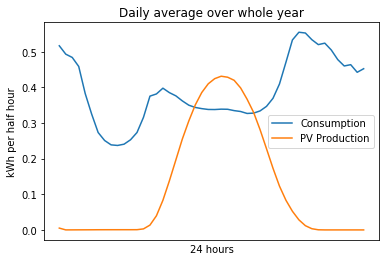

In [6]:
# Average over all days of the year
num_days = 365
avg_cons = np.zeros(48)
avg_prod = np.zeros(48)
for i in range(num_days):
    avg_cons += np.mean(df_cons.iloc[48*i:48*(i+1),:].values,axis=1)
    avg_prod += np.mean(df_prod.iloc[48*i:48*(i+1),:].values,axis=1)
avg_cons /= num_days
avg_prod /= num_days
plt.plot(avg_cons, label='Consumption')
plt.plot(avg_prod,label='PV Production')
plt.title('Daily average over whole year')
plt.xlabel('24 hours')
plt.xticks([])
plt.ylabel('kWh per half hour')
plt.legend()
plt.savefig('plots/daily_average.png',dpi=200)
#plt.close()

## Yearly production and consumption

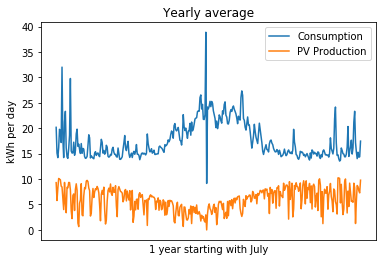

In [5]:
year_cons = df_cons.groupby([df_cons.index.month,df_cons.index.day]).sum()
year_cons_avg = np.mean(year_cons.values,axis=1)
year_prod = df_prod.groupby([df_prod.index.month,df_prod.index.day]).sum()
year_prod_avg = np.mean(year_prod.values,axis=1)
plt.plot(year_cons_avg, label='Consumption')
plt.plot(year_prod_avg, label='PV Production')
plt.xticks([])
plt.xlabel('1 year starting with July')
plt.legend(loc=1)
plt.ylabel('kWh per day')
plt.title('Yearly average')
plt.savefig('plots/yearly_average.png',dpi=200)
#plt.close()

## House selection
We are possibly not able to run the genetic algorithms on the majority of the houses. Therefore we select houses with reasonable measurement results to use them for later simulations. This is a data clean up in order to represent a realistic portion of houses. Here we look at single houses and their consumption and production.

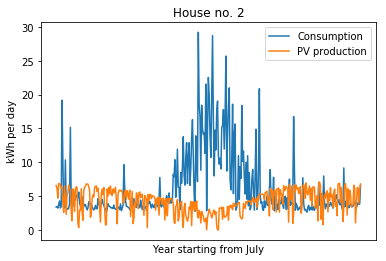

In [366]:
num_house=2
used_houses = [114,204,47,160,82,168]
year_cons_house = year_cons.iloc[:,num_house].values
year_prod_house = year_prod.iloc[:,num_house].values

plt.plot(year_cons_house,label='Consumption')
plt.plot(year_prod_house,label='PV production')
plt.legend()
plt.ylabel('kWh per day')
plt.xlabel('Year starting from July')
plt.xticks([])
plt.title('House no. ' + str(num_house))
plt.show()

In [367]:
# Limit the input data to selected houses
df_cons_red = df_cons.iloc[:,used_houses]
df_prod_red = df_prod.iloc[:,used_houses]
df_cons_red.shape

(17473, 6)

## Week selection
As we can see above, the description is in good agreement with the overall expectation. However it is too much to simulate the whole year, all the time. Hence we are going to reduce the simulated time, to only one week. This week needs to be chosen carefully, within the year. A week during summer period would result in a rather small pv system, since it is always sunny. During the winter period this might the other way around. Hence we try to find a week in spring ( autumn could also be possible ) to simulate our data on.


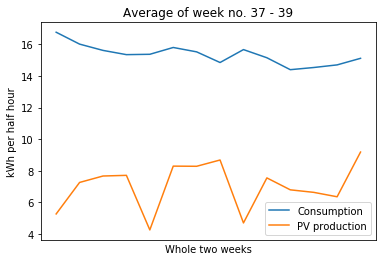

In [368]:
num_week = 37
num_week2 = num_week+2
avg_cons_week = year_cons_avg[7*num_week:7*(num_week2)]
avg_prod_week = year_prod_avg[7*num_week:7*(num_week2)]

plt.plot(avg_cons_week, label='Consumption')
plt.plot(avg_prod_week, label='PV production')
plt.xlabel('Whole two weeks')
plt.xticks([])
plt.ylabel('kWh per half hour')
plt.legend()
plt.title('Average of week no. ' + str(num_week) + ' - ' + str(num_week2))
plt.show()